## Setting Things Up

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path

In [3]:
from fastai.metrics import error_rate

In [4]:
from fastai.vision import *

In [5]:
bs = 64

In [6]:
path = Path('/home/fazzl/data/isic')

In [7]:
path.ls()

[PosixPath('/home/fazzl/data/isic/train'),
 PosixPath('/home/fazzl/data/isic/models'),
 PosixPath('/home/fazzl/data/isic/valid'),
 PosixPath('/home/fazzl/data/isic/test')]

## Getting The Data

In [8]:
tfms = get_transforms()

data = ImageDataBunch.from_folder(path, 
                                  train='train', 
                                  valid='valid', 
                                  size=224, 
                                  ds_tfms=tfms, 
                                  bs=bs).normalize(imagenet_stats)

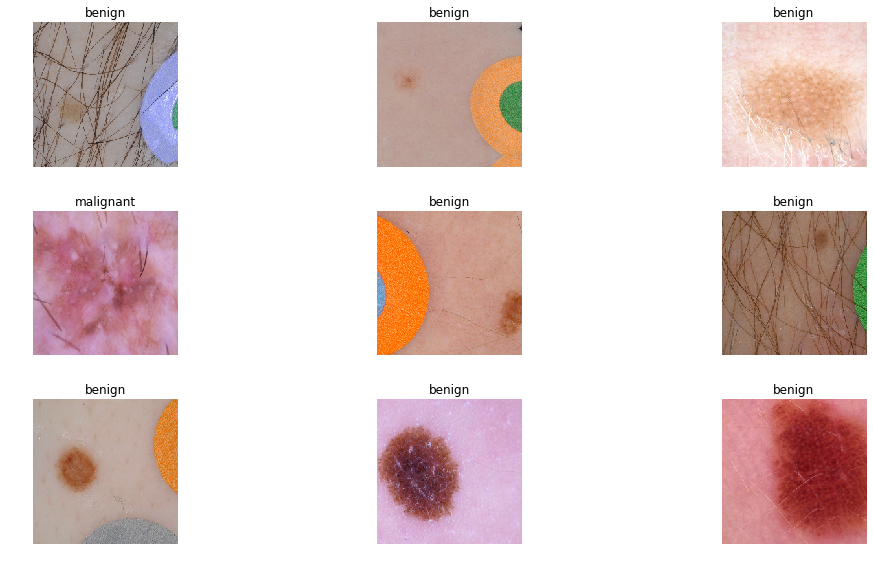

In [9]:
data.show_batch(rows=3, figsize=(16,8))

## Creating a Pretrained Model

In [10]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/fazzl/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [01:34<00:00, 1082952.39it/s]


In [11]:
learn.fit_one_cycle(4)

Total time: 1:02:35
epoch  train_loss  valid_loss  error_rate
1      0.274208    0.212882    0.098319    (15:46)
2      0.226806    0.192976    0.090756    (15:40)
3      0.193648    0.174800    0.077311    (15:33)
4      0.186585    0.170908    0.078571    (15:34)

